In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score,median_absolute_error



In [64]:
data = pd.read_csv("train.csv")
data = data.set_index("Index")


In [66]:
import re

def remove_html_and_emojis(text):
    text = re.sub(r'[^\w\s.,+-:e<>/]', '', str(text)) 
    text = re.sub(r'<.*?>', '', text)
    return text

def filter_texts(text):
    cleaned_text = remove_html_and_emojis(text)
    matches = re.findall(r'\d+\.\d+|\d+', str(text))
    if matches:
        floats = [float(match) for match in matches if '.' in match]
        if floats:
            return floats[0]

        return float(matches[0])
    return None
columns_to_clean = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                    "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
for col in columns_to_clean:
    data[col] = data[col].apply(filter_texts)


In [67]:
data.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
Index,,,,,,,,,,
0,0.264409,2.673538,2.336743,1.431972,1.303685,1.563001,0.697062,2.010126,1.608873,1.252351
1,0.012034,2.630323,2.495853,0.911372,1.181754,1.741640,0.896108,1.807786,1.478430,1.124565
2,0.491167,1.221378,1.438038,1.506492,1.700871,2.322337,1.035440,1.548768,1.008907,0.525886
3,0.486553,1.259134,1.151006,2.658852,3.035266,2.409255,1.185713,1.232375,1.249935,0.715288
4,0.075488,1.656818,1.095344,2.169616,1.520531,1.990604,1.237182,1.589307,1.515182,0.890722
5,0.952811,2.382632,2.998136,2.175062,2.090412,3.359521,0.682809,1.105796,0.735112,0.865772
6,0.276463,1.361867,2.421970,1.313533,1.244584,2.194050,0.900565,2.128849,0.785627,1.526794
7,0.677905,1.316457,1.105912,2.420481,2.487642,2.074494,1.762708,1.144729,0.997059,0.674121
8,0.797761,2.026853,1.600900,1.063683,1.649692,1.551590,1.325957,1.671247,1.407891,0.634432


In [68]:
data["ph"].value_counts()

ph
0.264409    1
0.033131    1
0.353707    1
0.994259    1
0.223712    1
           ..
0.573042    1
0.149913    1
0.132760    1
0.237587    1
0.692718    1
Name: count, Length: 10000, dtype: int64

In [69]:
data.head()  
data.info()  
data.describe()  


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  float64
dtypes: float64(10)
memory usage: 859.4 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.417378,1.792871,1.885334,1.577655,1.846947,2.106003,1.253408,1.774500,1.237249,0.964083
std,0.301558,0.515938,0.539495,0.455594,0.534522,0.605440,0.360951,0.516305,0.358583,0.280262
min,0.000000,1.000769,1.019553,0.771551,0.852042,0.960479,0.554247,0.782468,0.499873,0.367202
25%,0.162410,1.336876,1.410133,1.195690,1.404213,1.608786,0.953677,1.358345,0.963850,0.756679
50%,0.376920,1.722771,1.808627,1.516832,1.774148,2.024260,1.204477,1.700410,1.186442,0.924841
75%,0.652015,2.202312,2.313249,1.919671,2.238055,2.537743,1.512738,2.132153,1.460720,1.132913
max,7.413026,2.979110,3.216966,2.974793,3.649794,4.153664,2.507518,3.795695,2.928255,2.219079


In [70]:
data.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

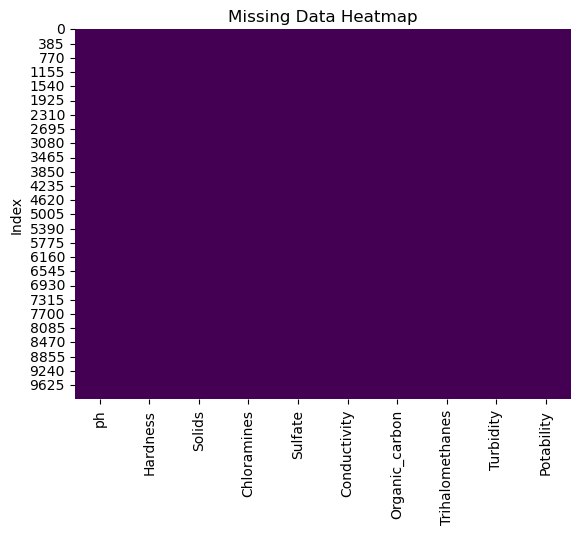

In [71]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


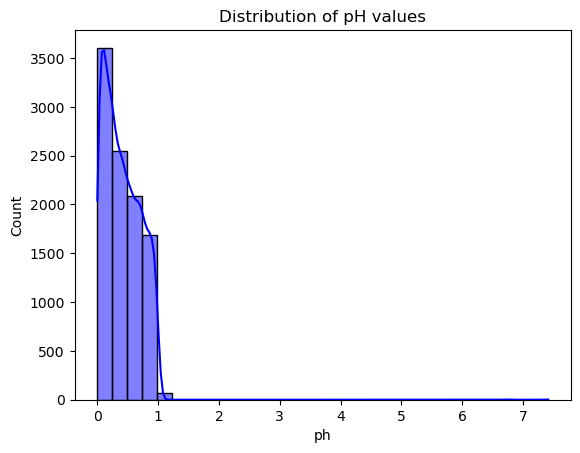

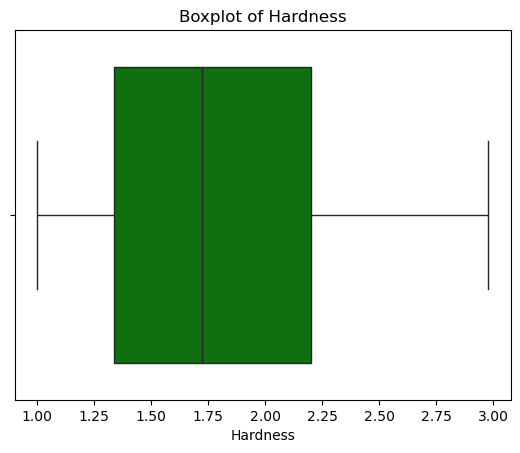

In [72]:
sns.histplot(data['ph'], kde=True, color='blue', bins=30)
plt.title('Distribution of pH values')
plt.show()

sns.boxplot(x=data['Hardness'], color='green')
plt.title('Boxplot of Hardness')
plt.show()


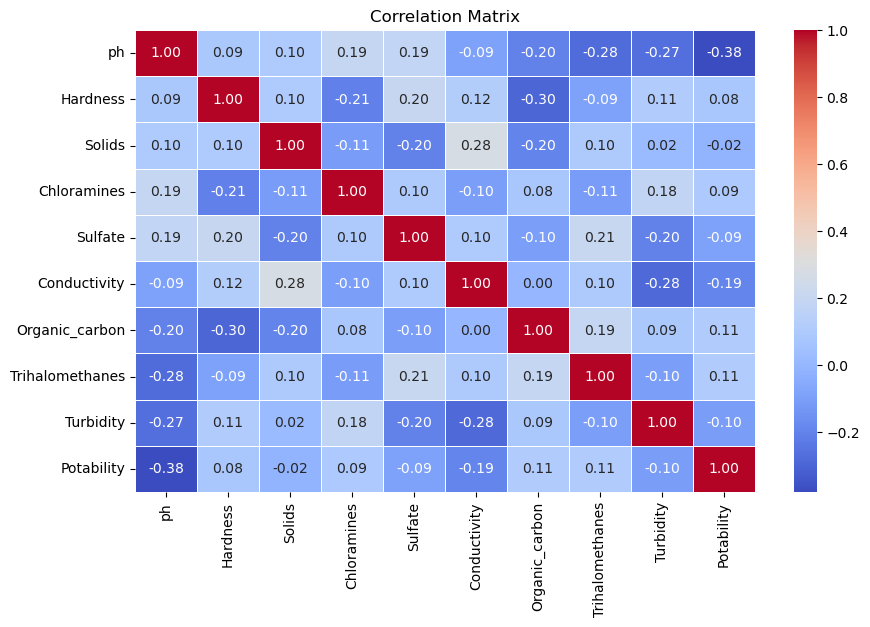

In [73]:
corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


#### Plot FeatureImportance

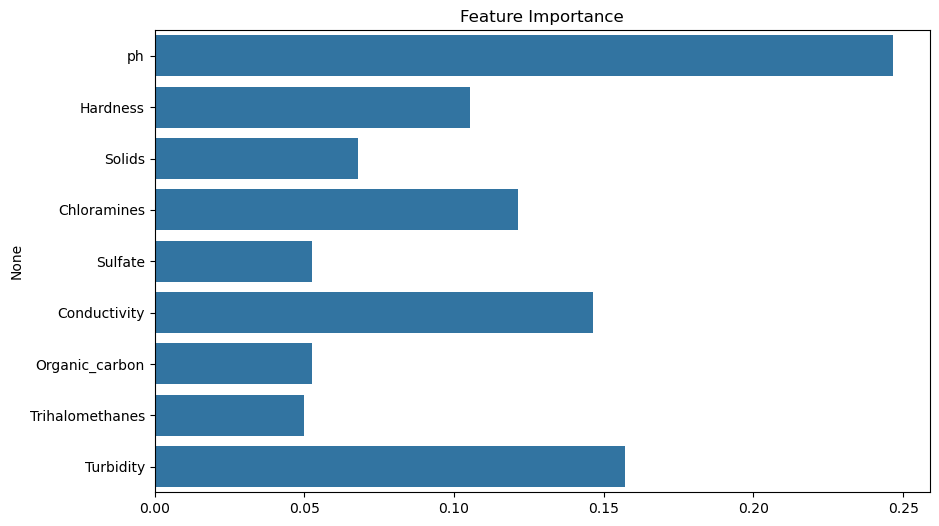

In [74]:

X = data.drop(columns=["Potability"], axis=1)
y = data["Potability"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


### Modeling with Xgboost

In [75]:
X = data.drop(columns=["Potability"], axis=1)
y = data["Potability"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(
    random_state=42, 
    tree_method='hist',
    
)

#### Hyper parameter Tunning with RandomizedSearchCV

In [76]:

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    # 'max_depth': randint(3, 10),
    # 'subsample': uniform(0.5, 0.5),
    # 'colsample_bytree': uniform(0.5, 0.5),
    # 'gamma': uniform(0, 1),
    'reg_alpha': uniform(0.01, 0.2),
    'reg_lambda': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=100, cv=10, scoring='neg_mean_squared_error', 
    random_state=42, n_jobs=-1
)

random_search.fit(X_train_scaled,y_train)

print("\nBest Parameters:")
print(random_search.best_params_)

y_pred = random_search.best_estimator_.predict(X_test_scaled)
score = max(0, 100 * (1 - median_absolute_error(y_test, y_pred)))


Best Parameters:
{'learning_rate': 0.021282315805420053, 'n_estimators': 443, 'reg_alpha': 0.17648852816008437, 'reg_lambda': 0.052467822135655234}


In [77]:
score = max(0, 100 * (1 - median_absolute_error(y_test, y_pred)))
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("\nR-squared:", r2_score(y_test, y_pred))
print("\nModel Score:", score)


Mean Squared Error: 0.037843786606856

R-squared: 0.5420399088798965

Model Score: 85.3531440158593


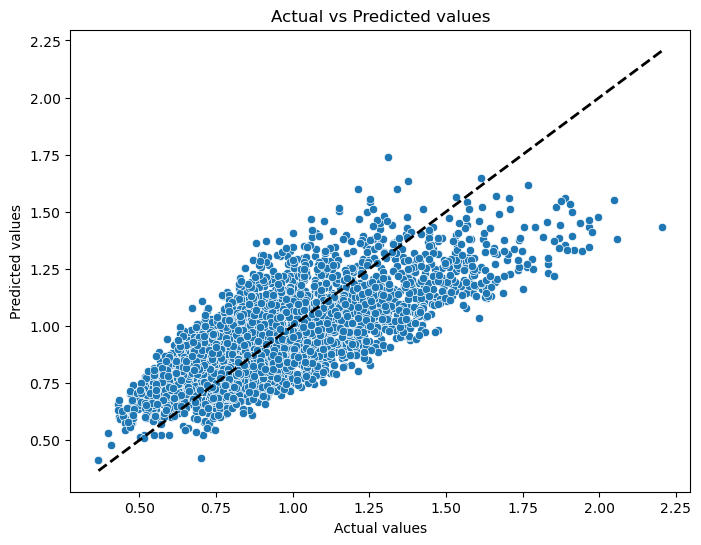

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()


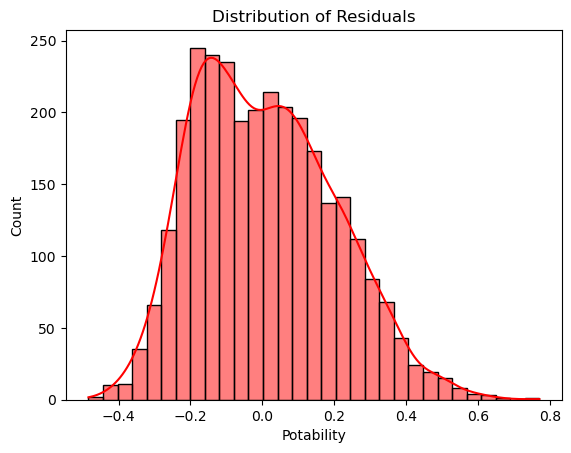

In [85]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.show()


##### Feature Importance after Training with xgboost

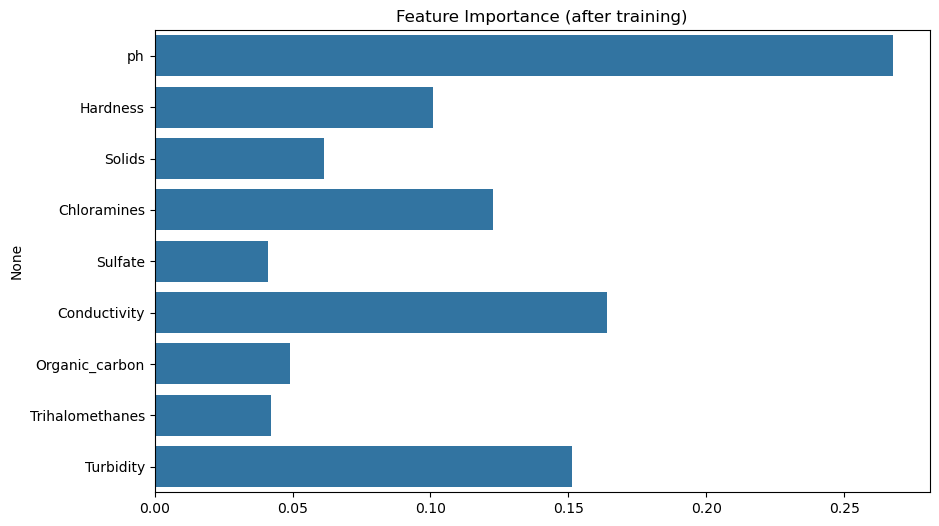

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x=random_search.best_estimator_.feature_importances_, y=X.columns)
plt.title('Feature Importance (after training)')
plt.show()


#### Prediction on Test dataset

In [81]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


def remove_html_and_emojis(text):
    text = re.sub(r'[^\w\s.,+-:e<>/]', '', str(text)) 
    text = re.sub(r'<.*?>', '', text)
    return text

def filter_texts(text):
    cleaned_text = remove_html_and_emojis(text)
    matches = re.findall(r'\d+\.\d+|\d+', str(text))
    if matches:
        floats = [float(match) for match in matches if '.' in match]
        if floats:
            return floats[0]

        return float(matches[0])
    return None

best_rf_model = random_search.best_estimator_
test_data = pd.read_csv("test.csv")
test_data = test_data.set_index("Index") 

columns_to_clean = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                    "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
for col in columns_to_clean:
    test_data[col] = test_data[col].apply(filter_texts)


test_data.fillna(test_data.median(), inplace=True)
# test_data.iloc[:,1:]


In [82]:
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Index,,,,,,,,,
10000,0.458326,1.000000,1.573929,1.540880,1.659576,2.156778,1.665096,2.105437,0.980957
10001,0.006164,2.379717,1.000000,1.225821,1.320635,2.251759,1.333259,1.480757,1.502542
10002,2.000000,2.000000,2.036084,2.430112,1.178618,1.614353,0.890702,1.824291,1.118714
10003,0.562824,1.836970,1.000000,1.910825,2.731592,1.626107,0.711949,2.598104,1.674618
10004,1.000000,1.000000,2.338528,1.940168,1.269851,1.832447,0.947763,1.052021,1.000000
...,...,...,...,...,...,...,...,...,...
14995,2.000000,1.107381,2.000000,2.506261,2.521742,2.431430,1.233360,1.432172,1.000000
14996,0.788690,1.540950,2.000000,1.424656,1.669503,1.355871,1.346191,1.074413,2.000000
14997,0.181496,2.000000,2.000000,1.957594,2.402041,1.730559,0.870003,1.449529,1.161218


In [83]:
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data)  
test_predictions = best_rf_model.predict(test_data_scaled)
predictions_df = pd.DataFrame(test_predictions, columns=["Potability"],index=test_data.index)
predictions_df.to_csv("submission.csv")
print(predictions_df.head())


       Potability
Index            
10000    1.304152
10001    1.409738
10002    1.136683
10003    1.168304
10004    1.226503
